## Draft

In [1]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from keras.layers import Conv1D, Dense, LSTM, Dropout
from keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras import activations
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt

In [200]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=42
)

In [201]:
pd.DataFrame(x_test)[:10]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.21719,0.0,10.59,1.0,0.489,5.807,53.8,3.6526,4.0,277.0,18.6,390.94,16.03
1,0.12932,0.0,13.92,0.0,0.437,6.678,31.1,5.9604,4.0,289.0,16.0,396.90,6.27
2,6.65492,0.0,18.10,0.0,0.713,6.317,83.0,2.7344,24.0,666.0,20.2,396.90,13.99
3,0.21409,22.0,5.86,0.0,0.431,6.438,8.9,7.3967,7.0,330.0,19.1,377.07,3.59
4,0.27957,0.0,9.69,0.0,0.585,5.926,42.6,2.3817,6.0,391.0,19.2,396.90,13.59
5,7.83932,0.0,18.10,0.0,0.655,6.209,65.4,2.9634,24.0,666.0,20.2,396.90,13.22
6,0.10000,34.0,6.09,0.0,0.433,6.982,17.7,5.4917,7.0,329.0,16.1,390.43,4.86
7,0.06211,40.0,1.25,0.0,0.429,6.490,44.4,8.7921,1.0,335.0,19.7,396.90,5.98
8,0.09065,20.0,6.96,1.0,0.464,5.920,61.5,3.9175,3.0,223.0,18.6,391.34,13.65
9,0.03445,82.5,2.03,0.0,0.415,6.162,38.4,6.2700,2.0,348.0,14.7,393.77,7.43


In [222]:
data_gen = tf.keras.preprocessing.sequence.TimeseriesGenerator(
    x_train,
    y_train,
    length=20,  # t-5 to t
    sampling_rate=1,
    stride=1,  # gap by n-days
    start_index=0,  # start on monday
    end_index=None,
    shuffle=False,
    reverse=False,
    batch_size=128
)  # doesn't contain horizon length settings only t+1 for y_train

In [216]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(20, 13)))
# model.add(keras.layers.Conv1D(filters=13, kernel_size=5, activation='relu', padding='same'))
# model.add(keras.layers.Dropout(0.5))
# model.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))
# model.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))
# # model.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))

model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.05))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(1))

model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 20, 128)           72704     
                                                                 
 lstm_34 (LSTM)              (None, 64)                49408     
                                                                 
 dense_99 (Dense)            (None, 64)                4160      
                                                                 
 dense_100 (Dense)           (None, 64)                4160      
                                                                 
 dense_101 (Dense)           (None, 64)                4160      
                                                                 
 dense_102 (Dense)           (None, 64)                4160      
                                                                 
 dense_103 (Dense)           (None, 1)               

In [217]:
model.compile(optimizer=Adam(learning_rate=1e-3), loss=['mse'])

In [ ]:
a = model.fit(data_gen, shuffle=False, epochs=1500)

3/3 [==============================] - 0s 25ms/step


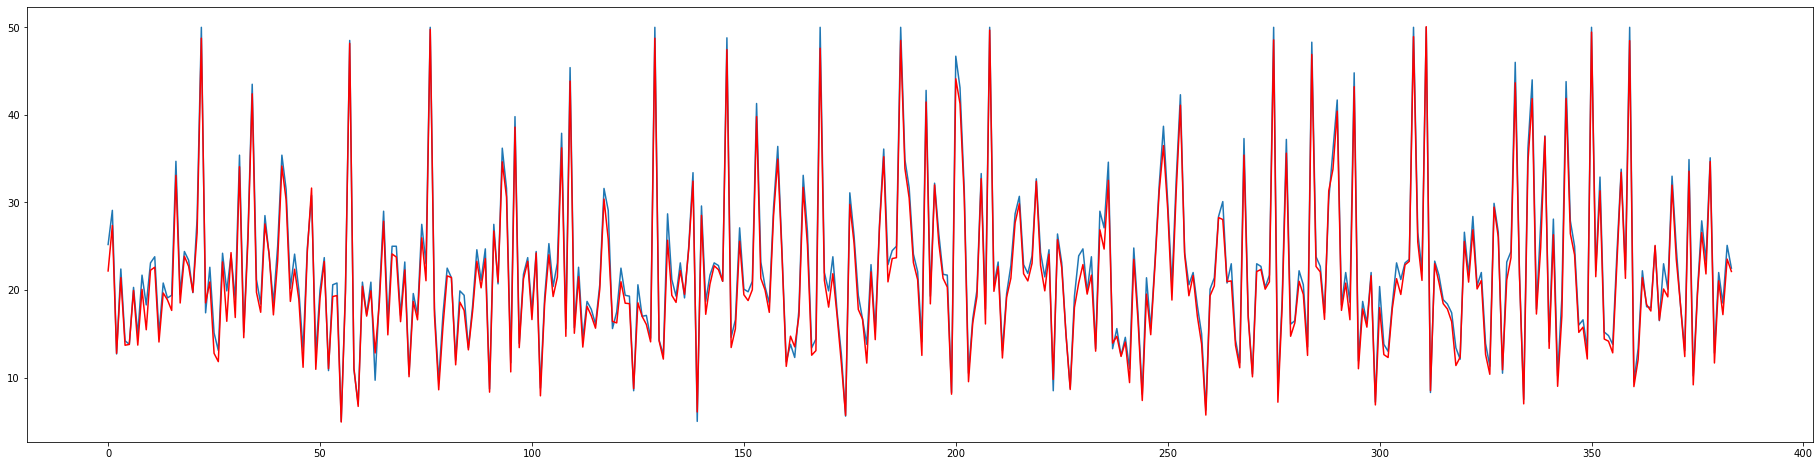

In [220]:
y_pred = model.predict(data_gen)
plt.figure(figsize=(32,8))
plt.plot(pd.Series(y_train).shift(-20))
plt.plot(y_pred, c='r')

In [221]:
data_gen_test = tf.keras.preprocessing.sequence.TimeseriesGenerator(
    x_test,
    y_test,
    length=20,  # t-5 to t
    sampling_rate=1,
    stride=1,  # gap by n-days
    start_index=0,  # start on monday
    end_index=None,
    shuffle=False,
    reverse=False,
    batch_size=1
)

82/82 [==============================] - 0s 3ms/step


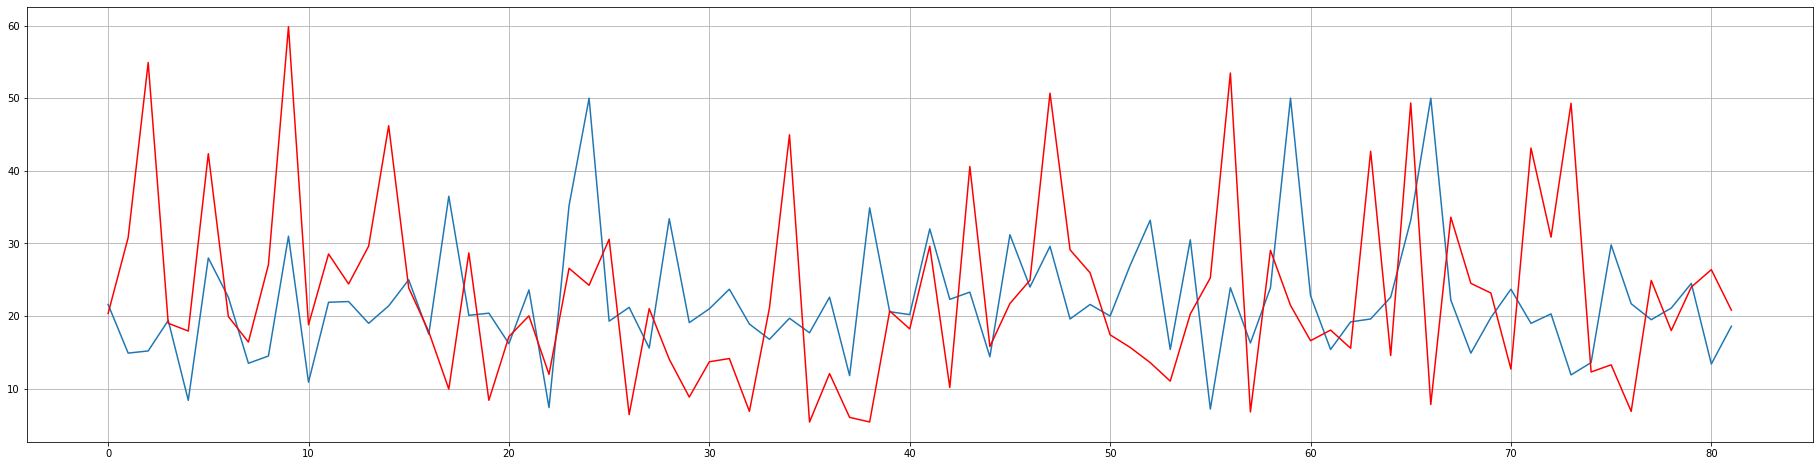

In [226]:
y_pred = model.predict(data_gen_test)
plt.figure(figsize=(32,8))
plt.plot(pd.Series(y_test).shift(-20))
plt.plot(y_pred, c='r')
plt.grid()

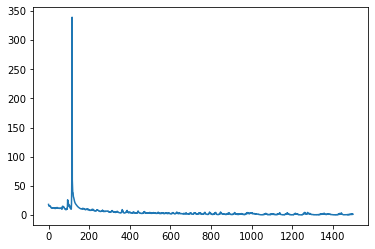

In [223]:
plt.plot(a.history['loss'])

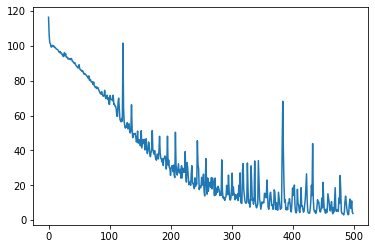

In [513]:
plt.plot(a.history['loss'])

In [103]:
list(data_gen_test)[0][1]

array([21.6, 14.9, 15.2, 19.4,  8.4, 28. , 22.6, 13.5, 14.5, 31. , 10.9,
       21.9, 22. , 19. , 21.4, 25. , 17.5, 36.5, 20.1, 20.4, 16.2, 23.6,
        7.4, 35.2, 50. , 19.3, 21.2, 15.6, 33.4, 19.1, 21. , 23.7, 18.9,
       16.8, 19.7, 17.7, 22.6, 11.8, 34.9, 20.6, 20.2, 32. , 22.3, 23.3,
       14.4, 31.2, 24. , 29.6, 19.6, 21.6, 20. , 27. , 33.2, 15.4, 30.5,
        7.2, 23.9, 16.3, 23.9, 50. , 22.8, 15.4, 19.2, 19.6, 22.6, 33.2,
       50. , 22.2, 14.9, 19.8, 23.7, 19. , 20.3, 11.9, 13.6, 29.8, 21.7,
       19.5, 21.1, 24.5, 13.4, 18.6])

### Simple dense lin reg

In [109]:
x_train.shape

(404, 13)

In [205]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(None, 404, 13)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, None, 404, 128)    1792      
                                                                 
 dense_87 (Dense)            (None, None, 404, 64)     8256      
                                                                 
 dense_88 (Dense)            (None, None, 404, 1)      65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [206]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=['mse'])

In [ ]:
a = model.fit(np.log1p(x_train), np.log1p(y_train), shuffle=False, epochs=500)

13/13 [==============================] - 0s 1ms/step


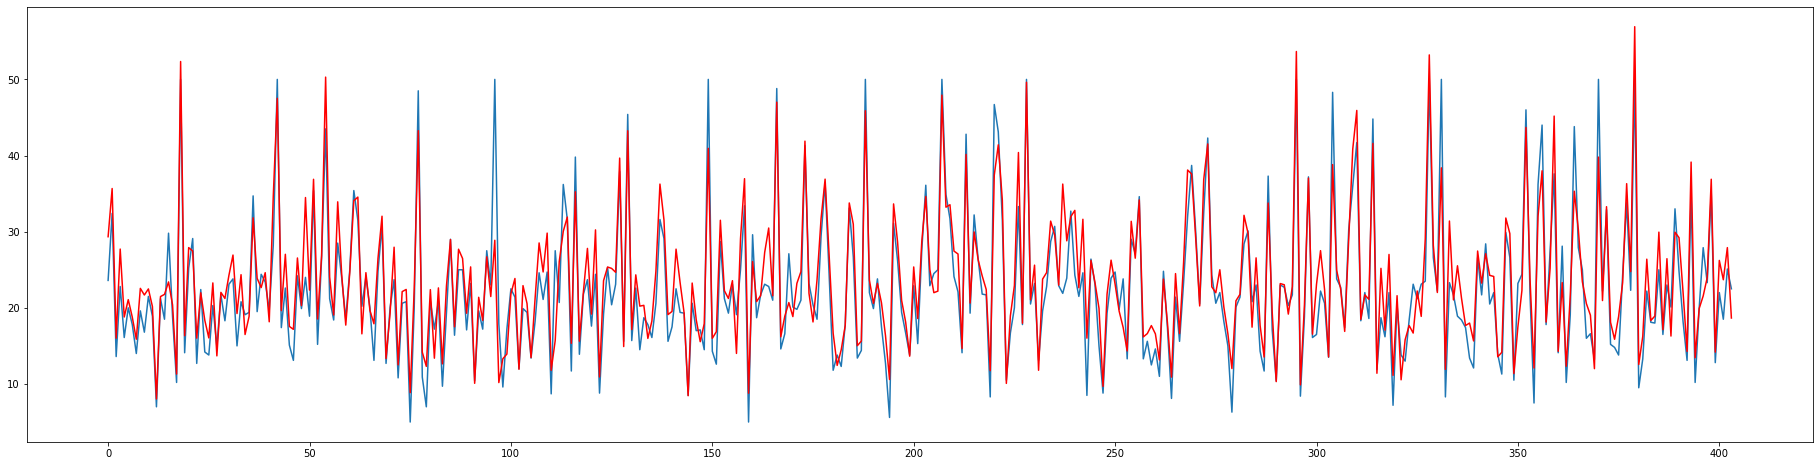

In [208]:
y_pred = model.predict(np.log1p(x_train))
plt.figure(figsize=(32,8))
plt.plot(pd.Series(y_train))
plt.plot(np.exp(y_pred), c='r')

4/4 [==============================] - 0s 2ms/step


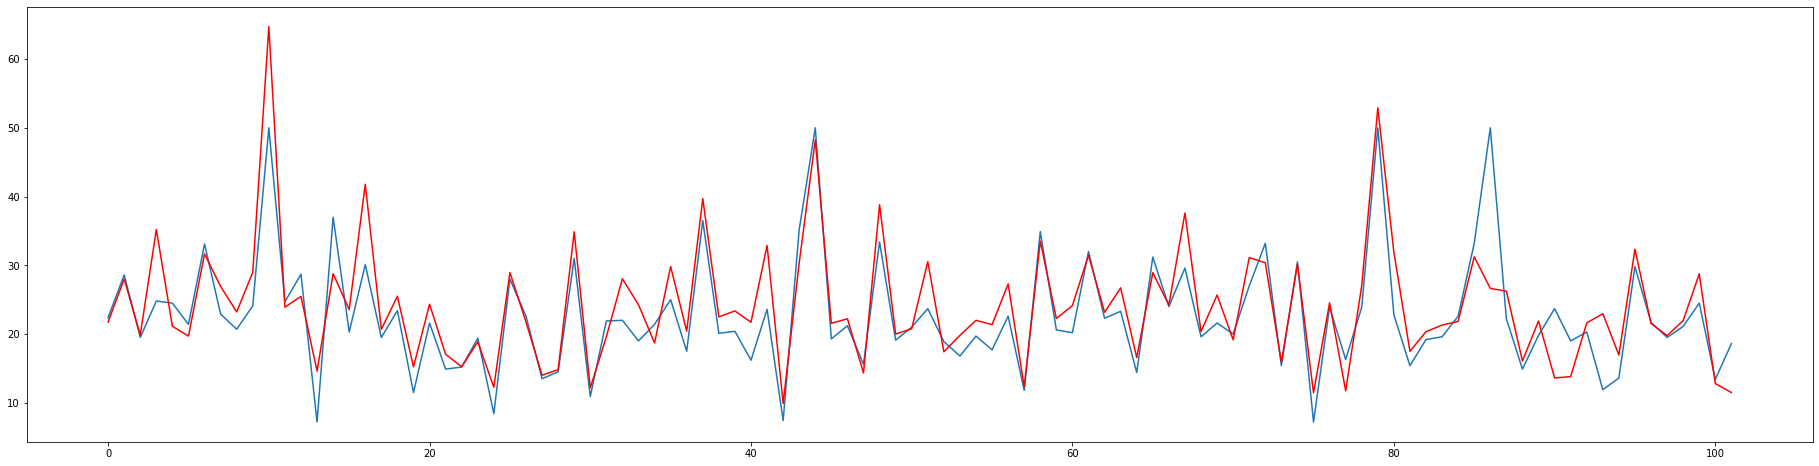

In [209]:
y_pred = model.predict(np.log1p(x_test))
plt.figure(figsize=(32,8))
plt.plot(pd.Series(y_test))
plt.plot(np.exp(y_pred), c='r')

### VMD-LSTM (one-step ahead)

In [227]:
%pip install vmdpy

Note: you may need to restart the kernel to use updated packages.


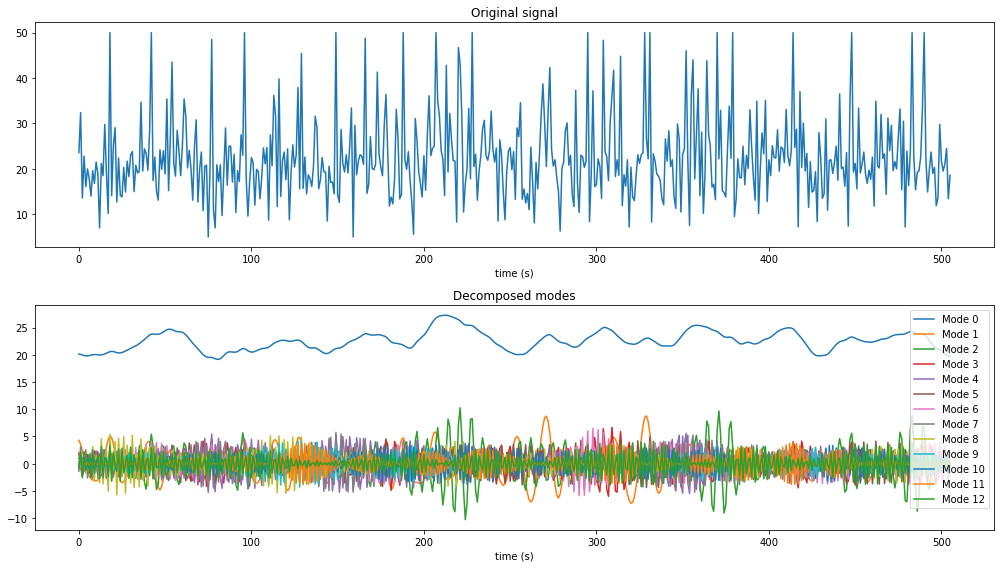

In [8]:
#%% Simple example: generate signal with 3 components + noise  
import numpy as np  
import matplotlib.pyplot as plt  
from vmdpy import VMD  

#. Time Domain 0 to T  
T = 1000  
fs = 1/T  
t = np.arange(1,T+1)/T  
freqs = 2*np.pi*(t-0.5-fs)/(fs)  

#. center frequencies of components  
f_1 = 2  
f_2 = 24  
f_3 = 288  

#. modes  
v_1 = (np.cos(2*np.pi*f_1*t))  
v_2 = 1/4*(np.cos(2*np.pi*f_2*t))  
v_3 = 1/16*(np.cos(2*np.pi*f_3*t))  

f = v_1 + v_2 + v_3 + 0.05*np.random.randn(v_1.size)  

#. some sample parameters for VMD  
alpha = 200       # moderate bandwidth constraint  
tau = 0.            # noise-tolerance (no strict fidelity enforcement)  
K = 13              # 3 modes  
DC = 0             # no DC part imposed  
init = 1           # initialize omegas uniformly  
tol = 1e-20  


#. Run VMD 
u, u_hat, omega = VMD(y, alpha, tau, K, DC, init, tol)  

#. Visualize decomposed modes
plt.figure(figsize=(14,8))
plt.subplot(2,1,1)
plt.plot(y)
plt.title('Original signal')
plt.xlabel('time (s)')
plt.subplot(2,1,2)
plt.plot(u.T)
plt.title('Decomposed modes')
plt.xlabel('time (s)')
plt.legend(['Mode %d'%m_i for m_i in range(u.shape[0])])
plt.tight_layout()

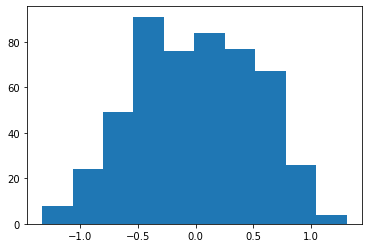

In [10]:
modes = pd.DataFrame(u.T)
plt.hist(np.sum(modes.T) - y)  # there is initial inherit expected error from VMD process
plt.show()
# this should be sensitivity analyzed and optimized for best RMSE before continue

In [205]:
(x, y), (_, _) = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=False, seed=42
)

In [11]:
modes[:10]  # x_train == y_pred; 13 to be predicted and summed up ()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,20.123672,4.285507,0.965255,1.963195,-0.892823,-0.836976,0.415728,-1.392262,-0.248507,-0.177091,-0.189839,-0.321123,-0.747567
1,20.069639,3.601914,0.545063,-0.611190,0.773865,1.552956,-0.773932,3.090189,0.817849,0.504631,0.491003,0.393692,2.016759
2,19.962535,2.374180,-0.183726,-2.295676,1.178183,-0.216936,0.417087,-2.211149,-1.332439,-0.721516,-0.702527,-0.411611,-2.554538
3,19.866221,0.925833,-0.819006,-0.739093,-0.492140,-1.412222,0.446615,-0.424358,1.695380,0.850083,0.842880,0.401982,2.224713
4,19.807490,-0.455773,-1.042068,1.781856,-1.542927,1.137679,-1.040645,2.568268,-1.690203,-0.939163,-0.948105,-0.401866,-1.184591
5,19.811312,-1.550997,-0.717159,1.649178,0.129593,0.576460,0.509942,-2.612288,0.947172,0.924735,0.949619,0.349892,-0.315643
6,19.865717,-2.294330,-0.034874,-0.986109,1.740723,-1.717751,0.579207,0.456554,0.390411,-0.915556,-0.936484,-0.323237,1.693173
7,19.941835,-2.738912,0.619456,-2.316664,0.056256,0.525062,-1.216944,1.994853,-1.989548,0.874538,0.869978,0.281549,-2.555008
8,20.008502,-2.987535,0.900106,-0.289674,-2.009774,1.566591,0.624952,-2.716652,3.129176,-0.814828,-0.764318,-0.231372,2.602399
9,20.041822,-3.121746,0.681516,2.318928,-0.173600,-1.558624,0.784459,1.206405,-3.047382,0.776081,0.664794,0.206233,-1.747502


In [12]:
data_gen = tf.keras.preprocessing.sequence.TimeseriesGenerator(
    modes[:-100],
    y[:-100],
    length=21,  # t-5 to t
    sampling_rate=1,
    stride=1,  # gap by n-days
    start_index=0,  # start on monday
    end_index=None,
    shuffle=False,
    reverse=False,
    batch_size=128
)

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(21, 13)))
# model.add(keras.layers.Conv1D(filters=13, kernel_size=5, activation='relu', padding='same'))
# model.add(keras.layers.Dropout(0.5))
# model.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))
# model.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))
# # model.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))

model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.05))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 21, 128)           72704     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 6

In [14]:
model.compile(optimizer=Adam(learning_rate=1e-3), loss=['mse'])

In [ ]:
a = model.fit(data_gen, shuffle=False, epochs=1000)

4/4 [==============================] - 0s 20ms/step


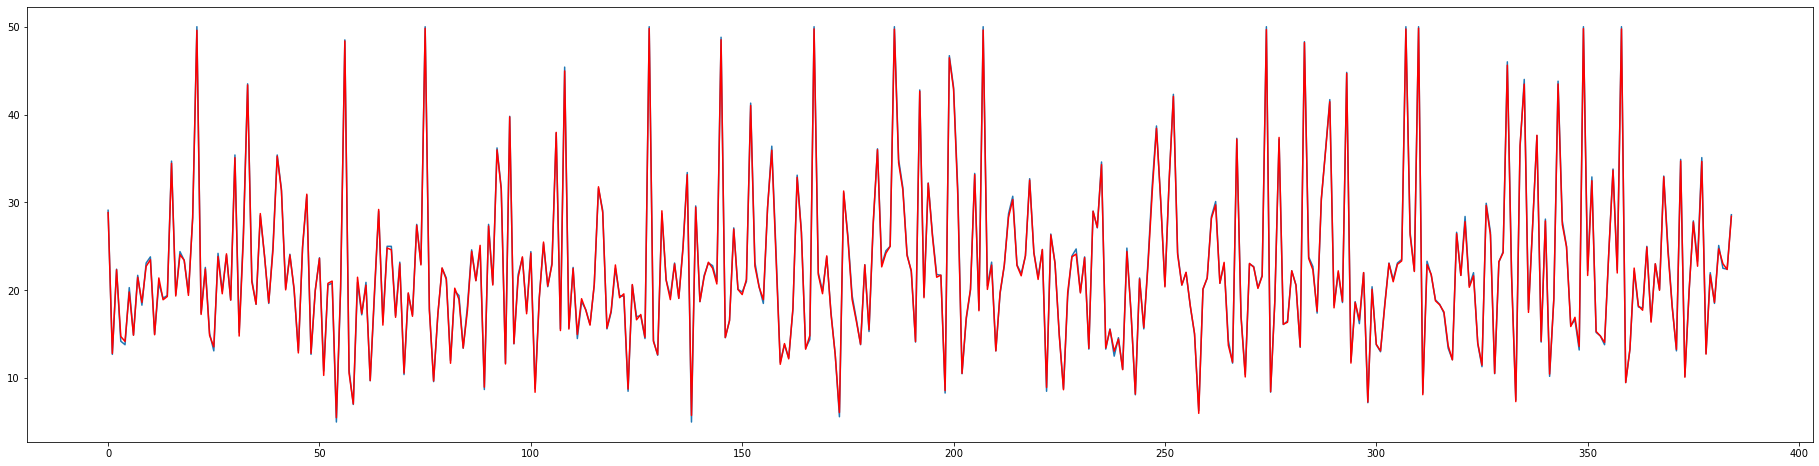

In [16]:
y_pred = model.predict(data_gen)  # cutted out to -15
plt.figure(figsize=(32,8))
plt.plot(pd.Series(y[:-100]).shift(-21))
plt.plot(y_pred, c='r')

1/1 [==============================] - 0s 61ms/step


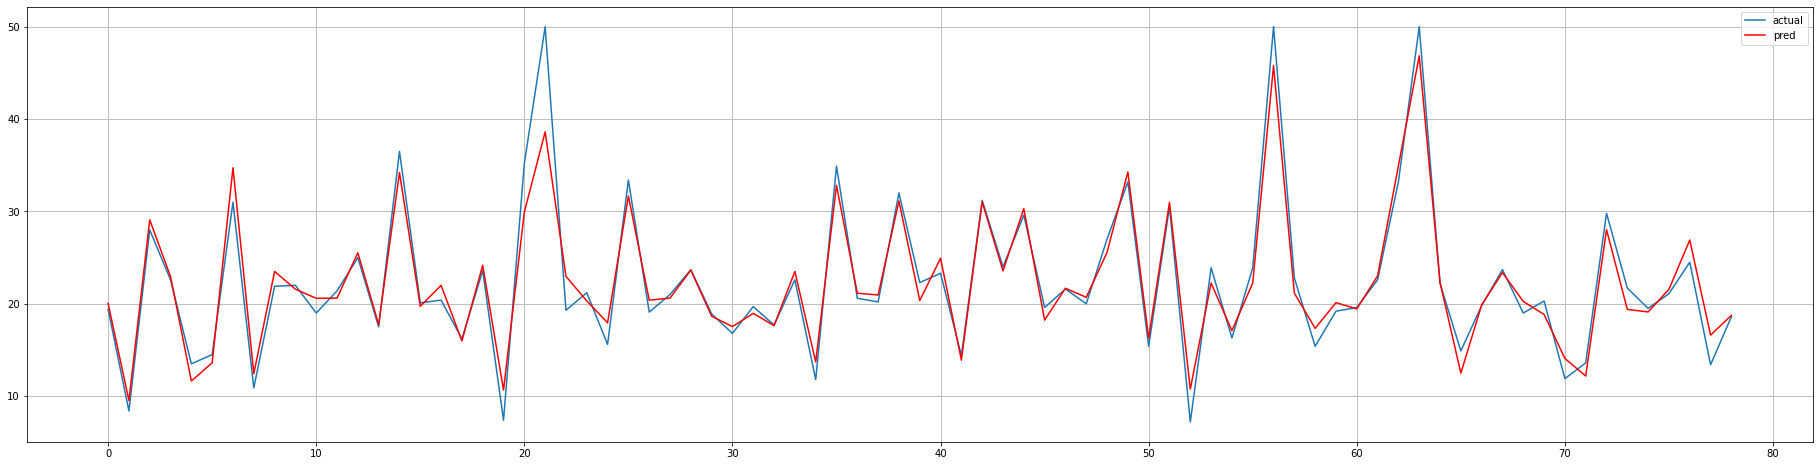

In [82]:
data_gen_test = tf.keras.preprocessing.sequence.TimeseriesGenerator(
    modes[-100:],
    y[-100:],
    length=21,  # t-5 to t
    sampling_rate=1,
    stride=1,  # gap by n-days
    start_index=0,  # start on monday
    end_index=None,
    shuffle=False,
    reverse=False,
    batch_size=128
)

y_pred = model.predict(data_gen_test)
plt.figure(figsize=(32,8))
plt.plot(pd.Series(y[-100:]).shift(-21), label='actual')
plt.plot(y_pred, c='r', label='pred')
plt.legend()
plt.grid()

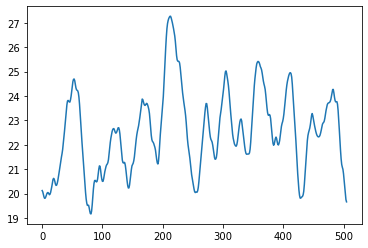

In [353]:
plt.plot(modes[0])

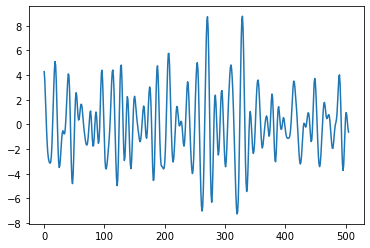

In [354]:
plt.plot(modes[1])

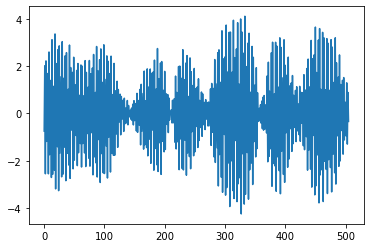

In [31]:
plt.plot(modes[12])

Good results on perfect data (modes available), for real world prediction we will have to predict those 13 modes (x_train) and sum them up for actual prediction. Error = sum(VMD error + each mode pred error)

Idea: Incorporate if possible 1)residual training and 2) attention layer

To do: spend more time on VMD part of the pipe (optimize VMD parameters for lowest possible initial inherit error form VMD process)

**Brainstorming**

**Important (pre-processing):**
- Make sure to completely understand how to feed sequence of target data while using generator processing.
- Use sensitivity analysis with x-axis Number of IMFs, and Alpha(reconstruct and see visually) parameters with y-axis RMSE
- Pick the parameters with lowest RMSE

**There are 2 methods for LSTM use with TS problem:**
- Decompose predict individually each IMF and reconstruct as autoregressive method
- Decompose use IMFs for input data as autoregressive method
- Use IMFs as additional derivative input features.

1/1 [==============================] - 0s 75ms/step


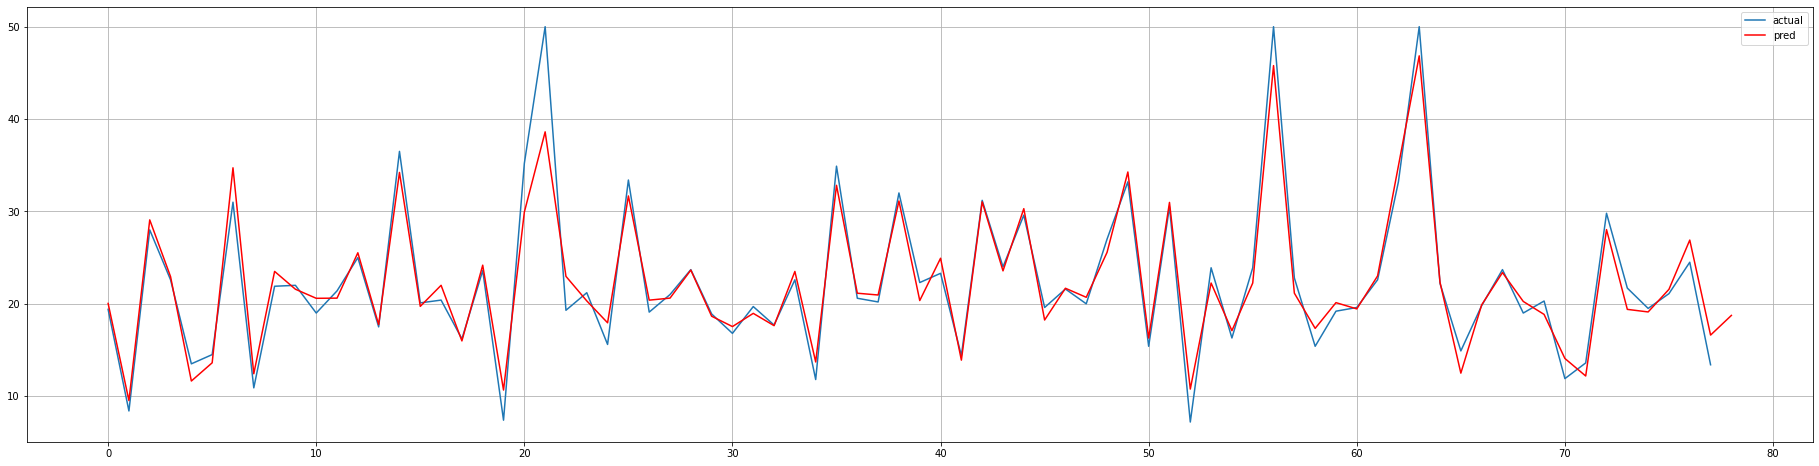

In [193]:
data_gen_test_ = tf.keras.preprocessing.sequence.TimeseriesGenerator(
    modes[-100:],
    np.zeros(100),  # don't leak target in testing set
    length=21,  # t-n to t
    sampling_rate=1,
    stride=1,  # gap by n-days
    start_index=0,  # start on monday
    end_index=None,
    shuffle=False,
    reverse=False,
    batch_size=128
)
y_pred = model.predict(data_gen_test_)
plt.figure(figsize=(32,8))
plt.plot(pd.Series(y[-79:-1]), label='actual')
plt.plot(y_pred, c='r', label='pred')
plt.legend()
plt.grid()

In [189]:
y_pred[-1]  # y_predicted

array([18.742659], dtype=float32)

In [190]:
y[-79:][-1]  # y_actual

18.6

Great results without fine tuning the VMD parameters.

In [186]:
verify = pd.DataFrame(data_gen_test_)
verify.columns = ['feat', 'target']
pd.DataFrame(verify.feat[0][-1])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,24.128302,0.144359,3.905611,2.304940,-2.049196,-1.640001,2.198030,-0.228042,-2.734387,-2.353313,1.462968,0.089139,-2.989145
1,23.948306,0.400649,-4.217497,1.161554,-2.507156,-2.907399,-3.380384,-0.721968,0.969741,2.593402,-1.366359,-0.100170,2.145150
2,23.811438,0.974047,-8.721211,-1.961445,2.021465,2.848725,0.584229,0.948386,0.982628,-2.547457,1.191784,0.083179,-0.953139
3,23.757286,1.918729,-6.062963,-3.027540,2.143821,1.163910,2.847877,-0.526794,-2.392594,2.109897,-1.057775,-0.136344,-0.430368
4,23.763286,3.019856,1.184144,-0.133880,-2.286033,-3.359774,-3.206574,-0.347705,2.525354,-1.473272,0.849110,0.148722,1.539921
5,23.766703,3.873933,6.840041,3.281313,-2.005714,0.542418,-0.160738,0.843064,-1.553202,0.652345,-0.637660,-0.176293,-2.236661
6,23.664735,4.025991,6.502592,2.486884,2.485164,2.952793,3.553511,-0.535323,0.108607,0.308467,0.489669,0.273661,2.477649
7,23.411248,3.263948,1.242433,-1.651285,2.175491,-1.635378,-2.677703,0.075024,1.391815,-1.074672,-0.213984,-0.264653,-2.012898
8,23.045498,1.741186,-3.850443,-3.368406,-2.215423,-1.673456,-1.168696,0.465449,-2.033419,1.741751,-0.002699,0.311235,1.224996
9,22.623779,-0.158187,-4.666440,-0.191783,-2.064716,2.192999,3.731652,-0.594567,1.729032,-2.126149,0.250934,-0.322620,-0.221755


In [187]:
modes[-21:]

,0,1,2,3,4,5,6,7,8,9,10,11,12
485,23.948306,0.400649,-4.217497,1.161554,-2.507156,-2.907399,-3.380384,-0.721968,0.969741,2.593402,-1.366359,-0.100170,2.145150
486,23.811438,0.974047,-8.721211,-1.961445,2.021465,2.848725,0.584229,0.948386,0.982628,-2.547457,1.191784,0.083179,-0.953139
487,23.757286,1.918729,-6.062963,-3.027540,2.143821,1.163910,2.847877,-0.526794,-2.392594,2.109897,-1.057775,-0.136344,-0.430368
488,23.763286,3.019856,1.184144,-0.133880,-2.286033,-3.359774,-3.206574,-0.347705,2.525354,-1.473272,0.849110,0.148722,1.539921
489,23.766703,3.873933,6.840041,3.281313,-2.005714,0.542418,-0.160738,0.843064,-1.553202,0.652345,-0.637660,-0.176293,-2.236661
490,23.664735,4.025991,6.502592,2.486884,2.485164,2.952793,3.553511,-0.535323,0.108607,0.308467,0.489669,0.273661,2.477649
491,23.411248,3.263948,1.242433,-1.651285,2.175491,-1.635378,-2.677703,0.075024,1.391815,-1.074672,-0.213984,-0.264653,-2.012898
492,23.045498,1.741186,-3.850443,-3.368406,-2.215423,-1.673456,-1.168696,0.465449,-2.033419,1.741751,-0.002699,0.311235,1.224996
493,22.623779,-0.158187,-4.666440,-0.191783,-2.064716,2.192999,3.731652,-0.594567,1.729032,-2.126149,0.250934,-0.322620,-0.221755
494,22.194471,-1.965435,-1.517584,3.327162,2.046415,0.374999,-2.030452,0.316022,-0.695496,2.206536,-0.500948,0.319134,-0.726518


**Results interpretation and verify:**

Proof that last modes row is not available in last prediction step thus the algorithm is not leaking and test evaluation is accurate one step ahead.
505 row in modes have the information of the last day that we are trying to predict.

[505	19.661809	-0.621257	-1.811628	-0.099596	-0.022822	-0.761961	2.192422	0.234329	0.120935	0.372140	0.235026	0.278190	-0.337212] not present in  pd.DataFrame(verify.feat[0][-1]) which batch of 21 rows is used to predict last y value

Notes:
- Input data should be stationary (ideally follow Engineering statistics online book methods for statistical control)

## Organize into function

To do:
- Create standart procedure for VMD parameter optimization
- Verify that complex model performs better than simple model without special pre-processing
- Try other datasets (make sure to follow statistical control of the data)

Notes:
- Do we need to have normally distributed residuals in reconstructed error (sum(IMFs) - y) ?
- Create param.py that will contain train/test split and generator length train/test slices

In [2]:
from vmdpy import VMD
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from keras.layers import Conv1D, Dense, LSTM, Dropout
from keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras import activations
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
# need to create validation part of testing!

class vmd_lstm:

    def train_data(x_train, y_train, length=21):
        '''Train data generator. Can be many steps ahead forecast.
        '''
        data_gen = tf.keras.preprocessing.sequence.TimeseriesGenerator(
            x_train,
            y_train,
            length=length,  # t-n to t
            sampling_rate=1,
            stride=1,  # gap by n-days
            start_index=0,  # ex. start on monday
            end_index=None,
            shuffle=False,
            reverse=False,
            batch_size=128
        )  # missing target length horizon (only manual setting)
        return data_gen
    
    def test_data(x_test, length=21):
        '''Test data should not leak y so y_test == np.zeros(len(x_test)).
        '''
        data_gen_test = tf.keras.preprocessing.sequence.TimeseriesGenerator(
            x_test,
            np.zeros(len(x_test)),
            length=length,  # t-n to t
            sampling_rate=1,
            stride=1,  # gap by n-days
            start_index=0,  # ex. start on monday
            end_index=None,
            shuffle=False,
            reverse=False,
            batch_size=128
        )  # missing target length horizon (only manual setting)
        return data_gen_test
    
    def lstm(input_data, epochs=500, learning_rate=1e-3):
        '''Custom model LSTM-DNN.
        Returns model formula and prints loss plot.
        '''
        model = keras.models.Sequential()
        # model.add(keras.layers.Input(shape=(21, 13)))
        # Can have CNN layer if we have many IMFs (test)
        model.add(LSTM(128, return_sequences=True, activation='relu'))
        model.add(LSTM(64, return_sequences=False, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(1))

        model.compile(optimizer=Adam(learning_rate=learning_rate), loss=['mse'])
        a = model.fit(input_data, shuffle=False, epochs=epochs, workers=-1, use_multiprocessing=True)
        plt.figure(figsize=(14,8))
        plt.plot(np.log1p(a.history['loss']))
        plt.title("log(Loss history)")
        plt.grid()

        return model
    
    def vmd(input_data, n_modes=13, alpha=200, tol=1e-20, plot=True):
        '''Input data and decompose it to n-modes.
        Function to be used in sensitivity analysis in pre-processing part.
        Returns decomposed_data , y_hat, omega.
        Use plot=False when grid searching for parameters.
        '''
        # Params  
        alpha = alpha  # quadratic penalty, high alpha == bias (sensitivity analysis)
        tau = 0.  # noise-tolerance (no strict fidelity enforcement)  
        K = n_modes  # modes count (sensitivity analysis)
        DC = 0  # no DC part imposed  
        init = 1  # initialize omegas uniformly  
        tol = tol  

        # VMD 
        modes, u_hat, omega = VMD(input_data, alpha, tau, K, DC, init, tol)  

        # Reconstruct data
        y = input_data
        reconstruct = np.sum(pd.DataFrame(modes))  # additive components; shape==(503, 13)
        rmse = np.sqrt(1/len(y) * np.sum(np.square(y-reconstruct)))
        mape = np.mean(np.abs(reconstruct/y-1))

        if plot == True:
            # Visualize decomposed modes
            plt.figure(figsize=(14,8))
            plt.subplot(2,1,1)
            plt.plot(input_data)
            plt.title('Original signal')
            plt.subplot(2,1,2)
            plt.plot(modes.T)
            plt.title('Decomposed modes')
            plt.legend(['Mode %d'%m_i for m_i in range(modes.shape[0])])
            plt.tight_layout()

            plt.figure(figsize=(14,8))
            plt.plot(y-reconstruct)
            plt.title("Reconstruction error")
            plt.figure(figsize=(14,8))
            plt.hist(y-reconstruct, bins='fd')

        return modes.T, rmse, mape
    
    def predict_test(x_test, len=21):
        '''x_test = Test data generated 
        from tf.TimeseriesGenerator()
        '''
        offset_length = 100 - len
        y_act = pd.Series(y[-offset_length:])  # uses global y
        y_pred = model.predict(x_test)  # weird format
        y_pred = pd.Series(y_pred.T[0])
        plt.figure(figsize=(32,8))
        plt.plot(y_act, label='actual')
        plt.plot(y_pred, c='r', label='pred')
        plt.legend()
        plt.grid()

        return y_pred, y_act

    def predict_train(x_train, len=21):
        '''x_train = Train data generated 
        from tf.TimeseriesGenerator()
        '''
        offset_length = 100 - len
        y_act = pd.Series(y[:-100]).shift(-21)
        y_pred = model.predict(x_train)
        y_pred = pd.Series(y_pred.T[0])
        plt.figure(figsize=(32,8))
        plt.plot(y_act, label='actual')
        plt.plot(y_pred, c='r', label='pred')
        plt.legend()
        plt.grid()
        
        return y_pred, y_act


In [3]:
# Use single target to be decomposed into x_train, x_test
(_, y), (_, _) = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=False, seed=42
)

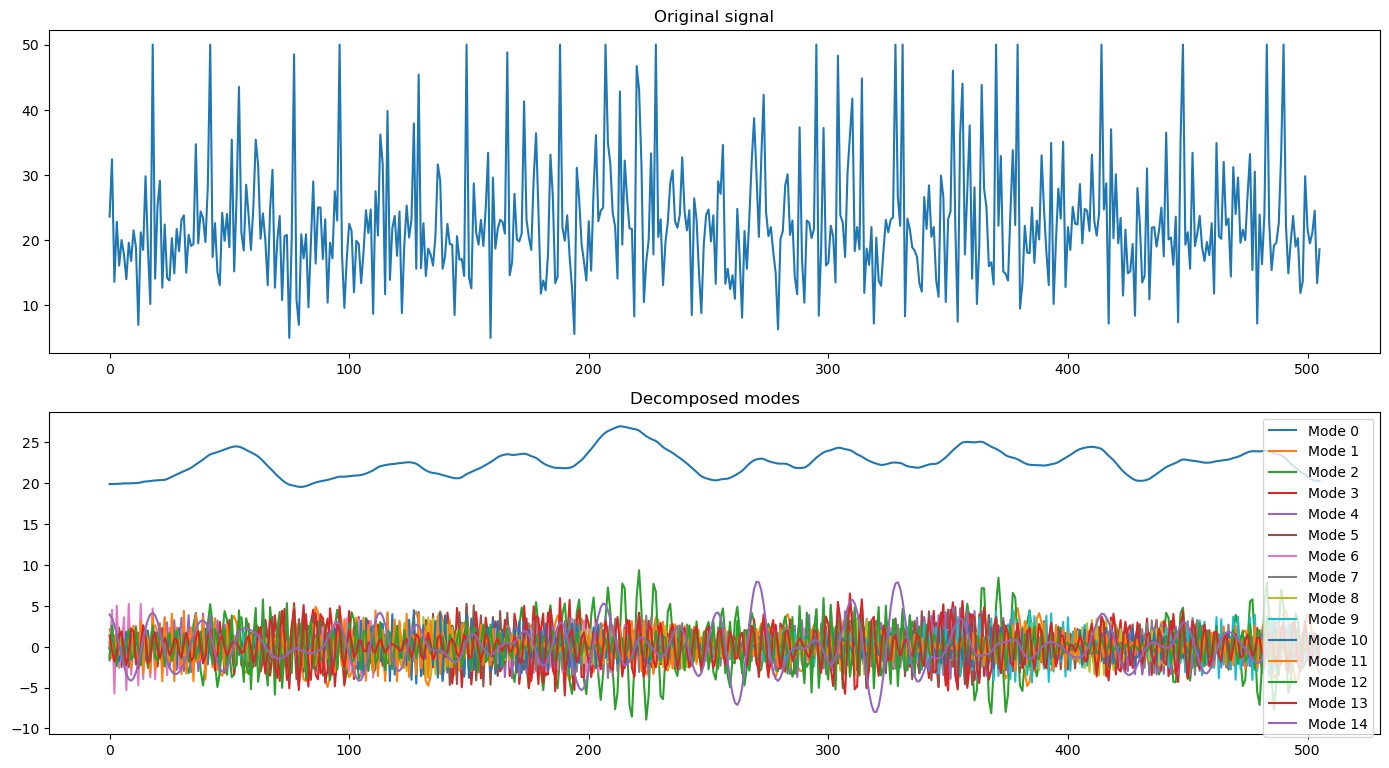

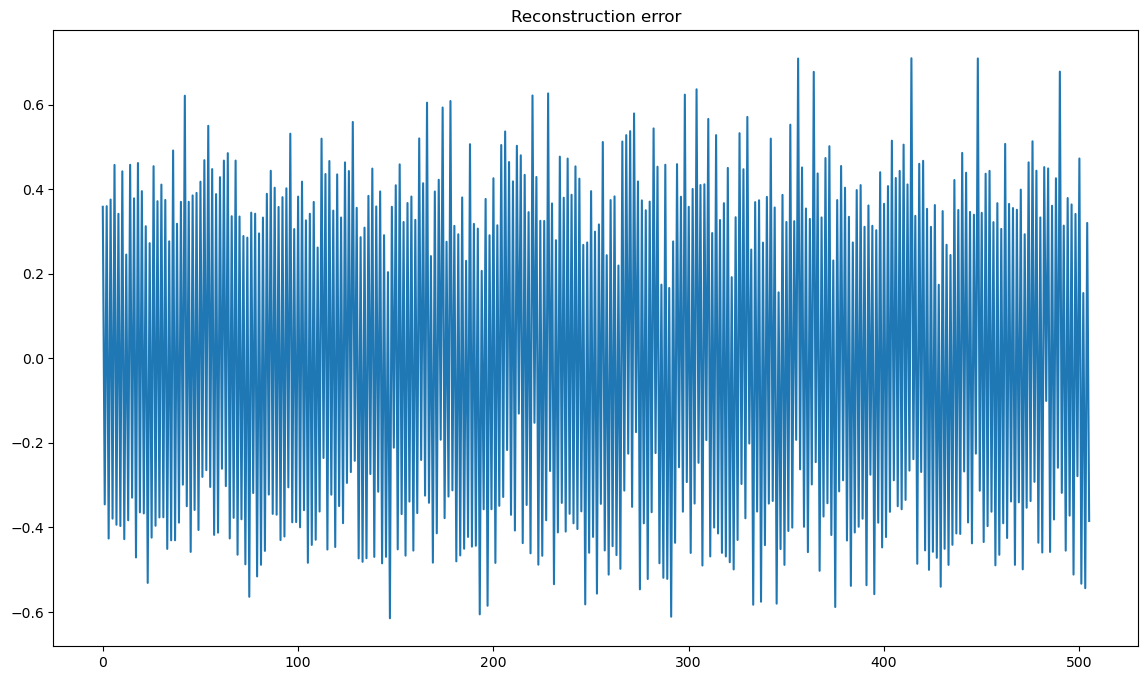

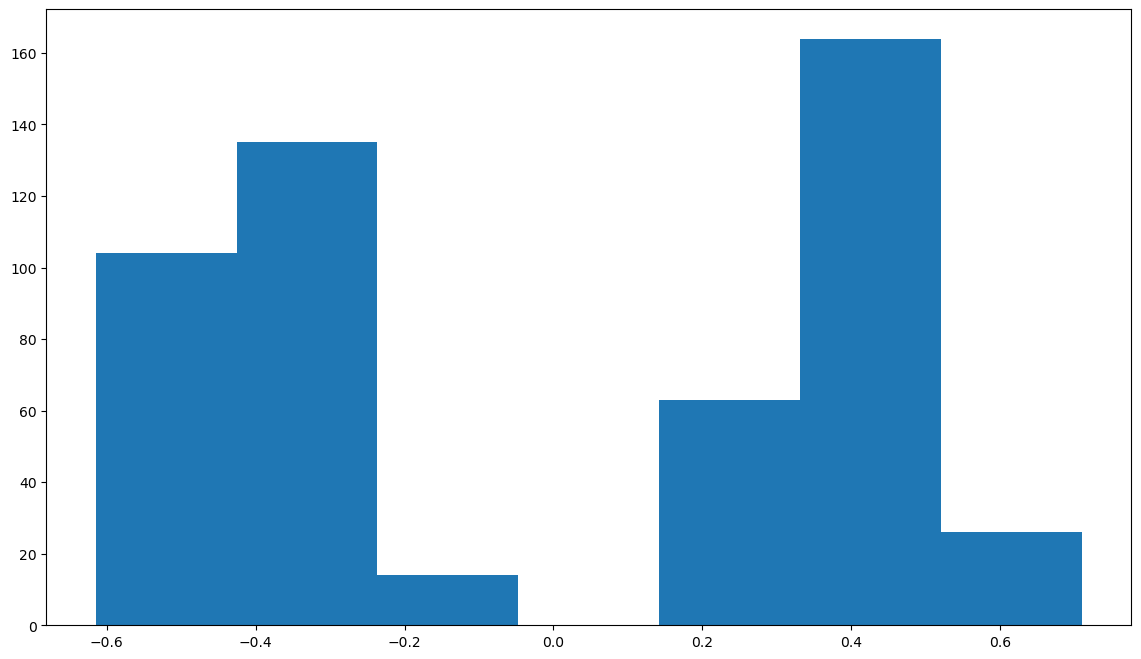

In [4]:
# IMFs input data (vmd param search)
modes, _, _ = vmd_lstm.vmd(y, n_modes=15, alpha=95)  # should hist(sum(IMFs) - y) be normally dist ?

In [5]:
# Split data(manually) and generate sequence slicing
x_train, y_train = modes[:-100], y[:-100]
x_test, y_test = modes[-100:], y[:-100]
data_gen = vmd_lstm.train_data(x_train, y_train)
data_gen_test = vmd_lstm.test_data(x_test)

Epoch 1/800
4/4 [==============================] - 5s 47ms/step - loss: 595.4890
Epoch 2/800
4/4 [==============================] - 0s 39ms/step - loss: 573.8275
Epoch 3/800
4/4 [==============================] - 0s 39ms/step - loss: 547.3640
Epoch 4/800
4/4 [==============================] - 0s 38ms/step - loss: 506.4892
Epoch 5/800
4/4 [==============================] - 0s 39ms/step - loss: 427.2669
Epoch 6/800
4/4 [==============================] - 0s 39ms/step - loss: 298.5412
Epoch 7/800
4/4 [==============================] - 0s 36ms/step - loss: 178.2493
Epoch 8/800
4/4 [==============================] - 0s 37ms/step - loss: 104.5059
Epoch 9/800
4/4 [==============================] - 0s 39ms/step - loss: 114.2355
Epoch 10/800
4/4 [==============================] - 0s 36ms/step - loss: 136.4342
Epoch 11/800
4/4 [==============================] - 0s 36ms/step - loss: 112.8189
Epoch 12/800
4/4 [==============================] - 0s 41ms/step - loss: 95.9801
Epoch 13/800
4/4 [========

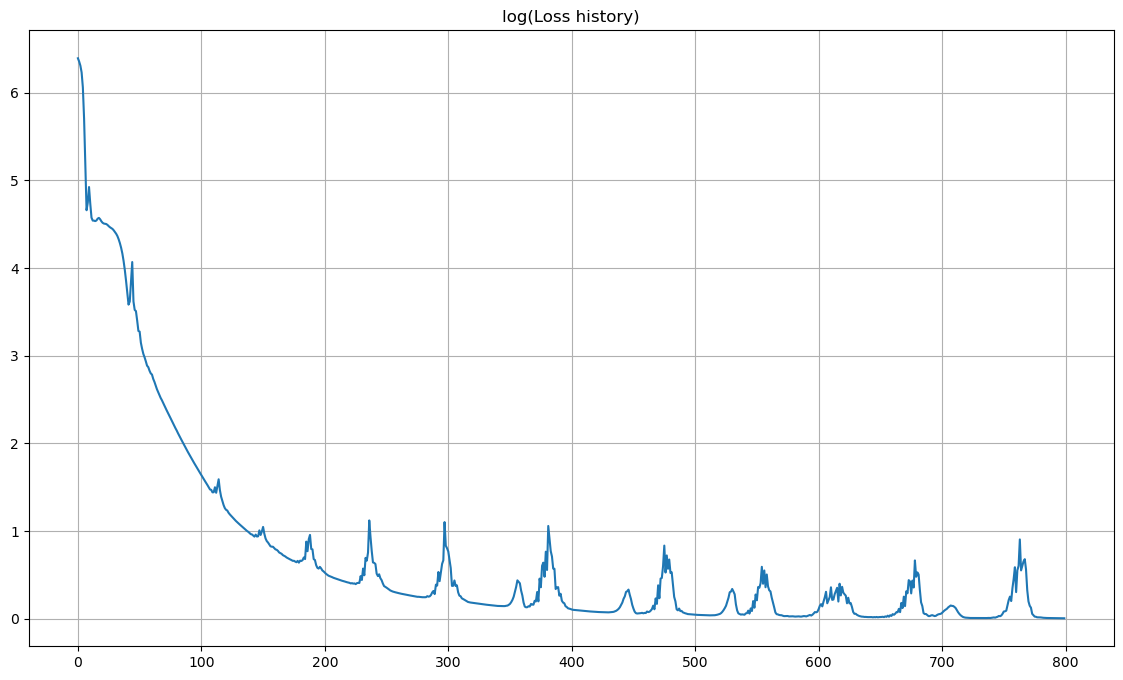

In [6]:
# Train
model = vmd_lstm.lstm(data_gen, epochs=800, learning_rate=1e-4)

### Performance test

In [7]:
def metrics(y_pred, y_act):
    '''Performance metrics.
    '''
    rmse = np.sqrt(1/len(y_act) * np.sum(np.square(y_act-y_pred)))
    mape = np.mean(np.abs(y_pred/y_act-1))
    wape = np.sum(np.abs(y_pred)) / np.sum(np.abs(y_act)) -1
    print("RMSE", round(rmse, 3))
    print("MAPE", round(mape, 3))
    print("WAPE", round(wape, 3))

4/4 [==============================] - 0s 35ms/step
RMSE 0.546
MAPE 0.026
WAPE 0.019


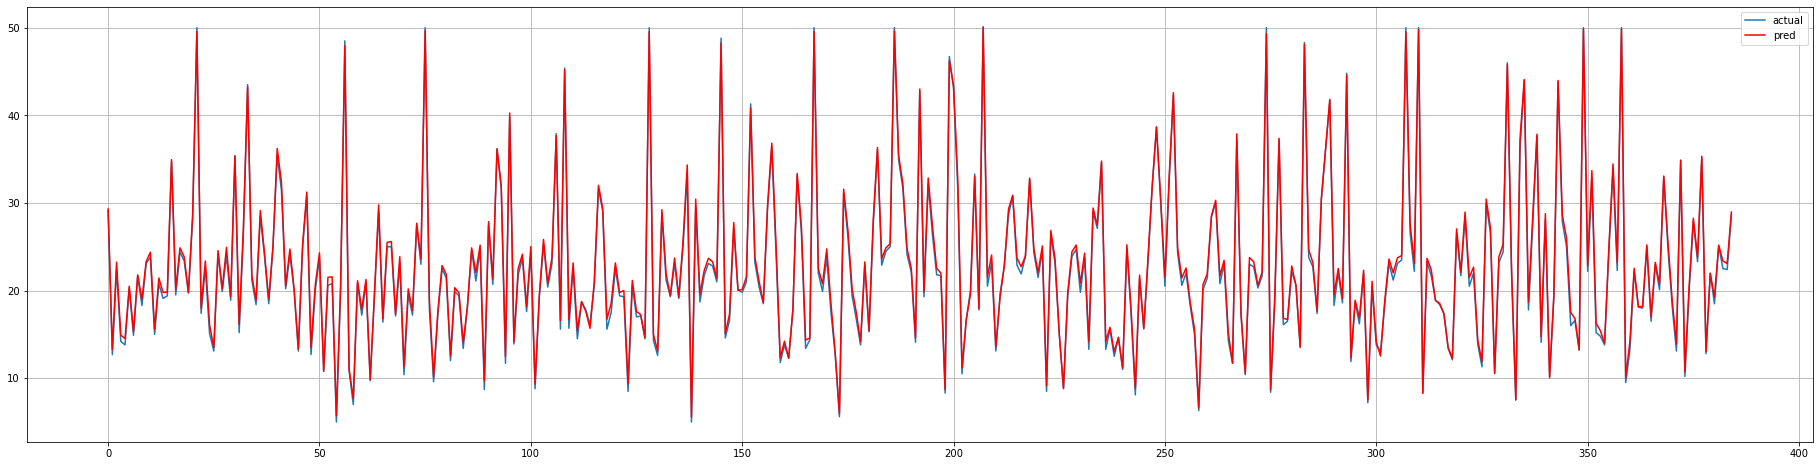

In [36]:
# Performance on seen data 13/200
y_pred, y_act = vmd_lstm.predict_train(data_gen)  # rmse calc not working as print into the func
metrics(y_pred, y_act)

4/4 [==============================] - 1s 22ms/step
RMSE 0.079
MAPE 0.003
WAPE -0.0


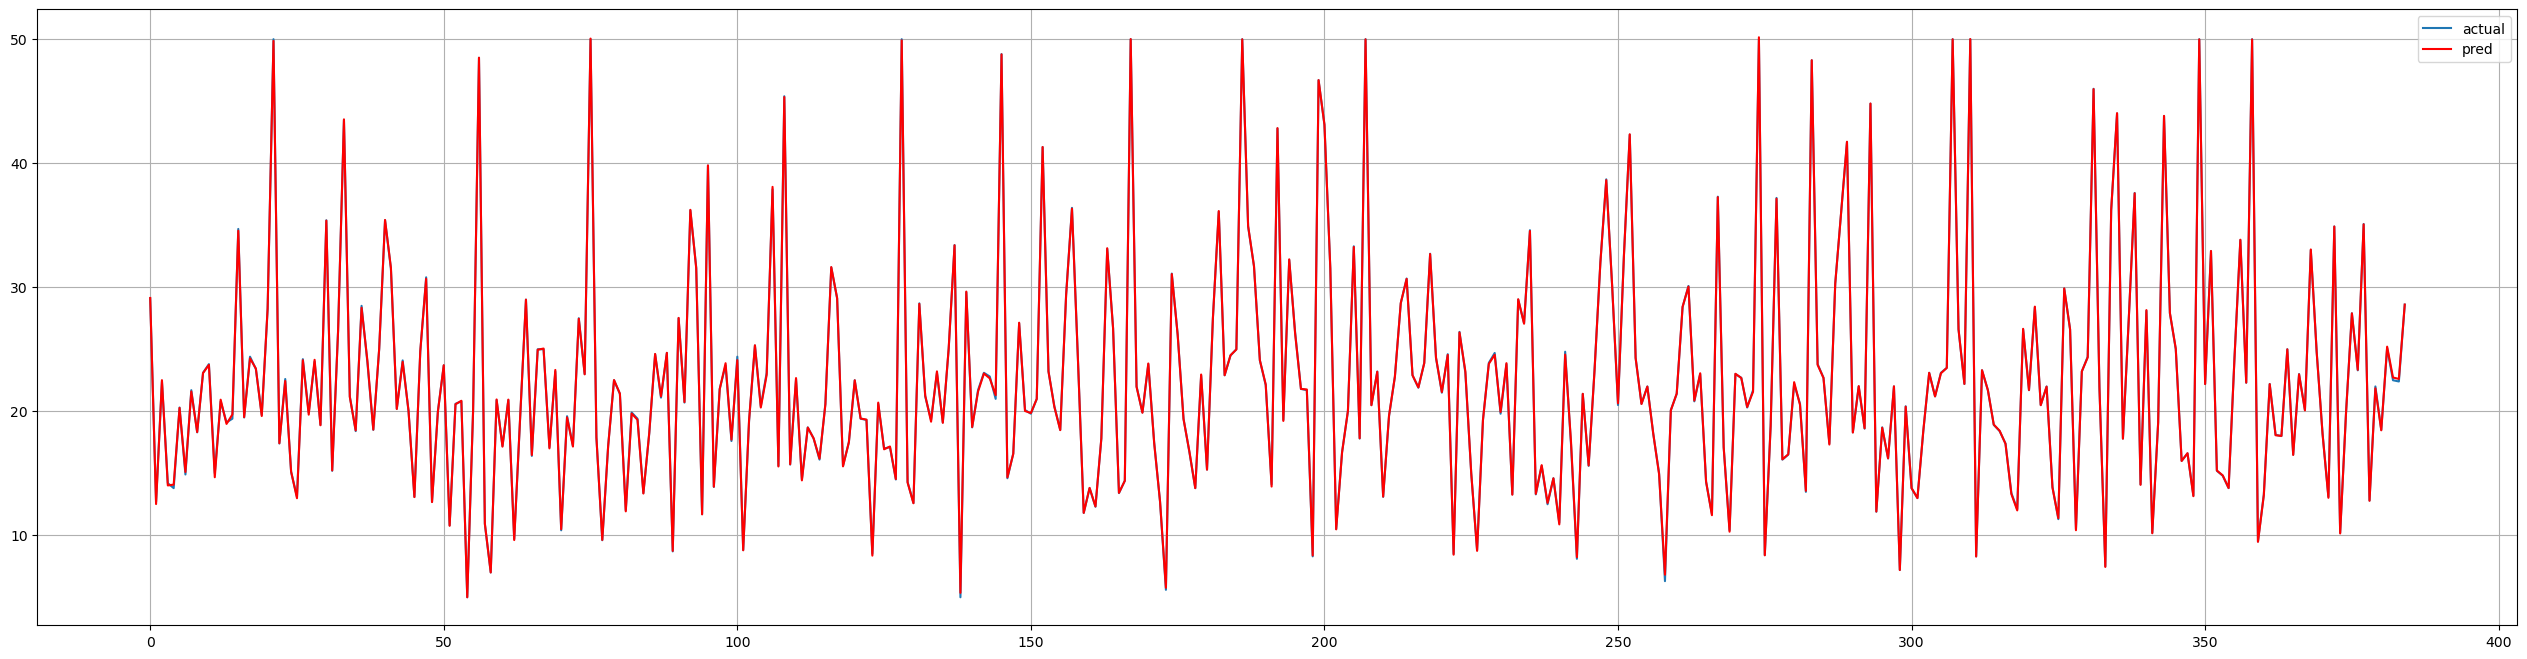

In [8]:
# Performance on seen data 15/95
y_pred, y_act = vmd_lstm.predict_train(data_gen)  # rmse calc not working as print into the func
metrics(y_pred, y_act)

1/1 [==============================] - 0s 62ms/step
RMSE 2.251
MAPE 0.081
WAPE -0.002


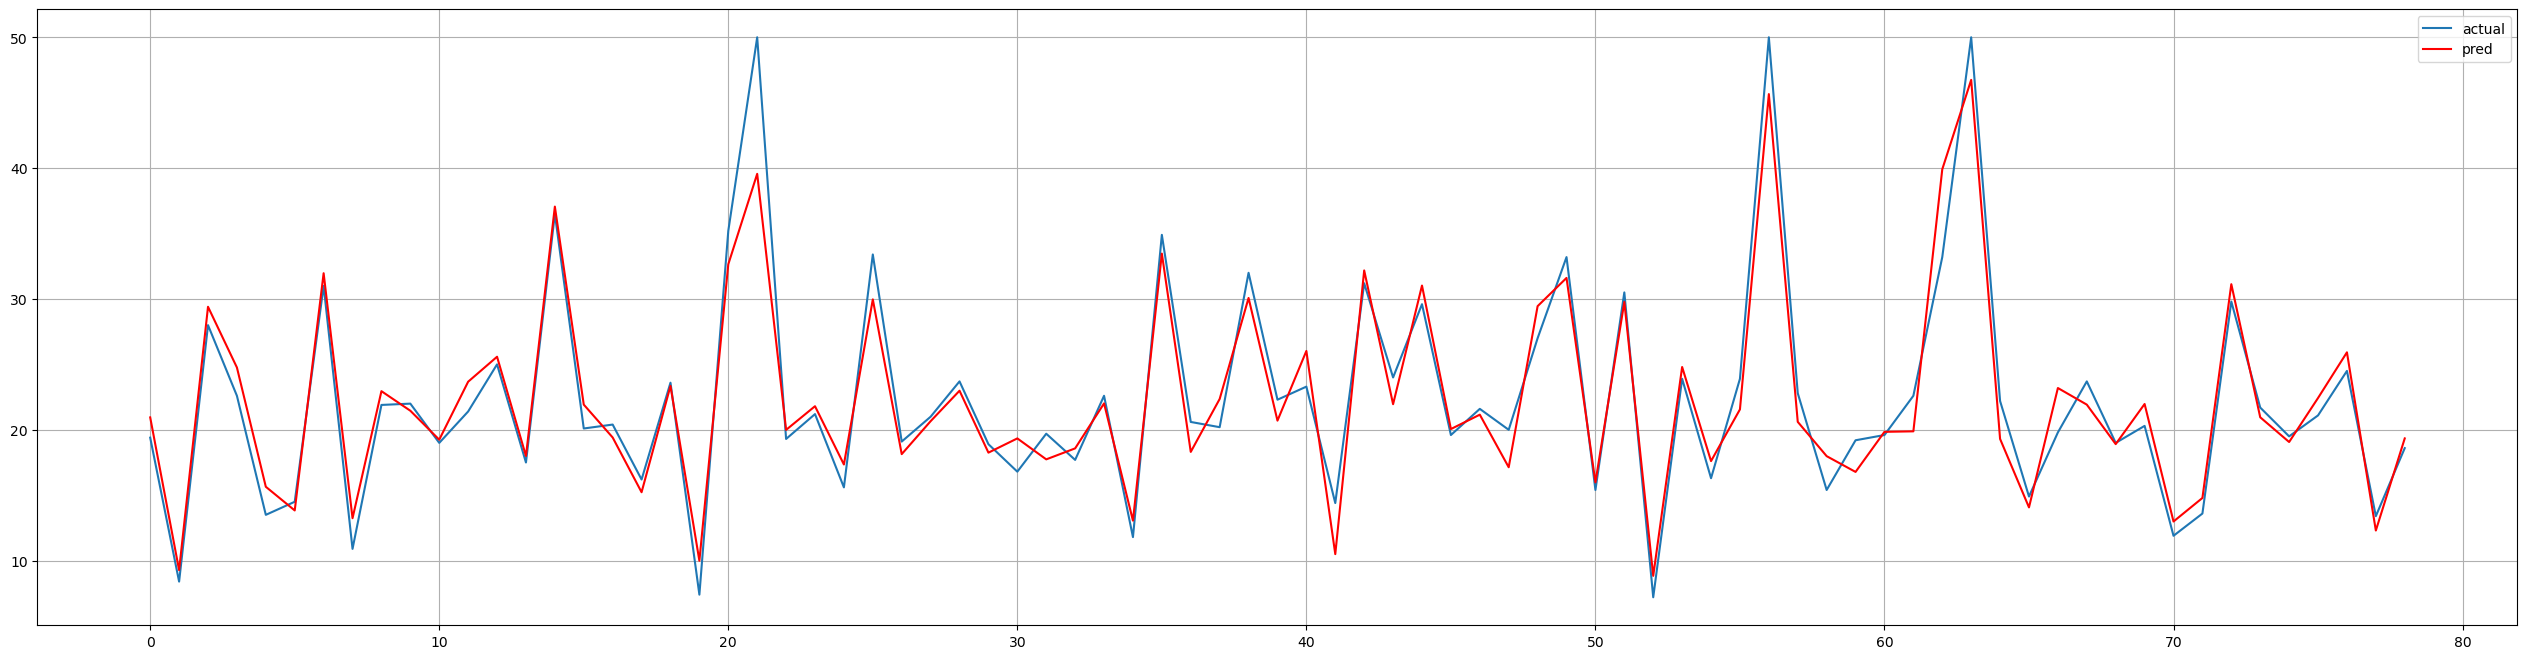

In [9]:
# Performance on unseen data 15/95
y_pred, y_act = vmd_lstm.predict_test(data_gen_test)  # rmse calc not working as print into the func
metrics(y_pred, y_act)

1/1 [==============================] - 0s 142ms/step
RMSE 3.101
MAPE 0.104
WAPE 0.009


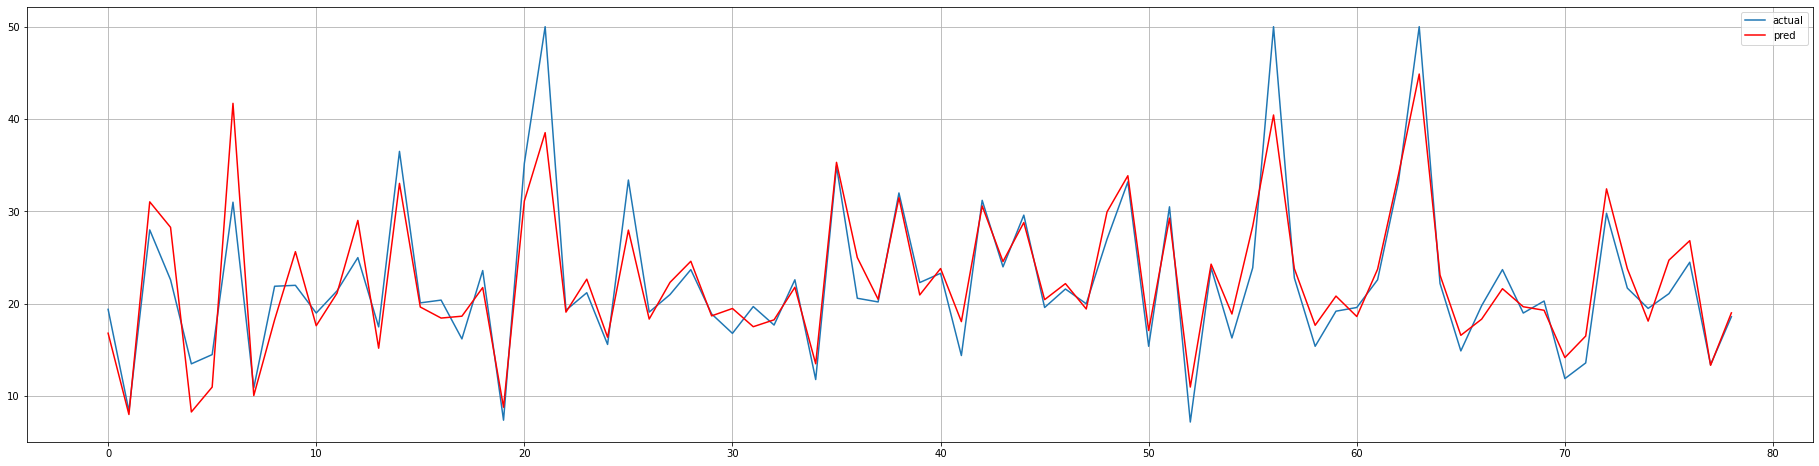

In [35]:
# Performance on unseen data 13/200
y_pred, y_act = vmd_lstm.predict_test(data_gen_test)  # rmse calc not working as print into the func
metrics(y_pred, y_act)

### VMD parameter search

In [47]:
%%time
# Sensitivity analysis
alphas = list(range(50, 525, 25))  #list(range(50, 100, 10))
Ks = list(range(2, 50, 1))  #list(range(2, 50, 1))
print('All combinations:', len(alphas) * len(Ks))

result_collect = []
for i in alphas:
    for j in Ks:
        modes, rmse, mape = vmd_lstm.vmd(y, n_modes=j, alpha=i, plot=False)
        result_collect.append([i, j, rmse, mape])
        
result = pd.DataFrame(result_collect, columns=['alpha', 'K', 'rmse', 'mape'])

All combinations: 912
CPU times: total: 15min 23s
Wall time: 17min 19s


First search

In [28]:
result.min()[2:]

rmse    0.395716
mse     0.020645
dtype: float64

In [36]:
result.nsmallest(5, ['rmse'])

,alpha,K,rmse,mse
44,50,46,0.395716,0.020782
40,50,42,0.395718,0.020785
45,50,47,0.395732,0.020784
30,50,32,0.395743,0.020781
46,50,48,0.395749,0.020790


In [37]:
result.nsmallest(5, ['mse'])

,alpha,K,rmse,mse
479,500,49,0.437731,0.020645
427,450,45,0.433354,0.020651
110,150,16,0.423473,0.020654
527,550,49,0.445059,0.020687
377,400,43,0.422108,0.020688


Sensitivity analysis:
- It seems that the most optimal K are around 45-50 for both RMSE and MAPE.
- With decreasing alpha we decrease RMSE and keep MAPE at low levels.
- Best pick will be low alpha and high decompose mode count.

Second search

In [6]:
result.min()[2:]

rmse    0.395677
mse     0.020641
dtype: float64

In [7]:
result.nsmallest(5, ['rmse'])  # alpha penalizer should be kept high with many modes (overfitting)

,alpha,K,rmse,mse
42,25,40,0.395677,0.020784
124,65,90,0.395688,0.020784
65,35,65,0.395688,0.020784
64,35,60,0.395688,0.020784
123,65,85,0.395688,0.020784


In [8]:
result.nsmallest(5, ['mse'])  # high alpha and low modes count should lead to bias

,alpha,K,rmse,mse
199,115,15,0.416654,0.020641
181,105,15,0.412467,0.020670
163,95,15,0.408625,0.020711
109,65,15,0.400503,0.020729
145,85,15,0.405880,0.020735


Third search

In [48]:
result.min()[2:]

rmse    0.395716
mape    0.020645
dtype: float64

In [52]:
result.nsmallest(5, ['mape'])

,alpha,K,rmse,mape
911,500,49,0.437731,0.020645
254,175,16,0.433502,0.020649
861,475,47,0.435196,0.020650
811,450,45,0.433354,0.020651
206,150,16,0.423473,0.020654


To do:
- Create standard procedure for choosing the best combination bias-variance wise. 
(Idea: first component should be close to moving average trend of the TS, rule of tumb: High IMFs count needs high alpha and vice versa)